In [1]:
!mkdir models7

In [2]:
!ls

models
models2
models3
models4
models5
models6
models7
RNN_LSTM_Keras_working_35epo_selected.ipynb
RNN_LSTM_Keras_working_50_epo_adam.ipynb
RNN_LSTM_Keras_working_50_epo_selected.ipynb
RNN_LSTM_Keras_working.ipynb
RNN_LSTM_Keras_working-just_for_50ep_SGD_Momentum_32B.ipynb
RNN_LSTM_Keras_working-just_for_50ep_SGD_Momentum-Copy1.ipynb
RNN_LSTM_Keras_working-just_for_50ep_SGD_No_Momentum.ipynb
RNN_LSTM_Keras_working-just_for_SGD_Momentum.ipynb


In [1]:
%matplotlib inline

from __future__ import print_function

import keras
from keras.datasets import fashion_mnist
from keras import optimizers

from keras.models import Model
from keras.layers import Input, Dense, TimeDistributed, LSTM
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


def img_resize(org_imgs, target_size):
  x_imgs = []
  for i in range(0,org_imgs.shape[0]):
    x_img = cv2.resize(org_imgs[i], dsize=(target_size, target_size), interpolation=cv2.INTER_CUBIC)
    x_imgs.append(x_img)
  return np.array(x_imgs)


def plot_model(model_details):

    # Create sub-plots
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    
    # Summarize history for loss
    axs[1].plot(range(1,len(model_details.history['loss'])+1),model_details.history['loss'])
    axs[1].plot(range(1,len(model_details.history['val_loss'])+1),model_details.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_details.history['loss'])+1),len(model_details.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    
    # Summarize history for accuracy
    axs[0].plot(range(1,len(model_details.history['acc'])+1),model_details.history['acc'])
    axs[0].plot(range(1,len(model_details.history['val_acc'])+1),model_details.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_details.history['acc'])+1),len(model_details.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    
    # Show the plot
    plt.show()
    
    
# Training parameters.
batch_sizes = [32]
num_epochs = [50]
learning_rates = [0.01,0.05]
optimizers_name = ['sgd']
num_classes = 10
node_sizes = [128]

# The data, shuffled and split between train and test sets.
(images, labels), (_, _) = fashion_mnist.load_data()

images_zoomed_in = img_resize(images, 48)
images_zoomed_in = images_zoomed_in.reshape(images_zoomed_in.shape[0], images_zoomed_in.shape[1], images_zoomed_in.shape[2], 1).astype('float32')

x_train = images_zoomed_in[0:50000]
x_test = images_zoomed_in[50000:60000]

y_train = labels[0:50000]
y_test = labels[50000:60000]


# x_train -= np.mean(x_train)
# x_test -= np.mean(x_train)

# x_train /= np.std(x_train)
# x_test /= np.std(x_train)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


TRAIN_DATA_SIZE = x_train.shape[0]
TEST_DATA_SIZE = x_test.shape[0]

#TRAIN_BATCH_SIZE = 20
#TEST_BATCH_SIZE = 10

#train_step = int(TRAIN_DATA_SIZE/TRAIN_BATCH_SIZE)
#test_step = int(TEST_DATA_SIZE/TEST_BATCH_SIZE)


# Converts class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

train_gen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
train_gen.fit(x_train)
#train_batches = train_gen.flow(x_train, y_train, batch_size=TRAIN_BATCH_SIZE, shuffle=False, seed=10)

test_gen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
test_gen.fit(x_train)
#test_batches = test_gen.flow(x_test, y_test, batch_size=TEST_BATCH_SIZE, shuffle=False, seed=10)

#row, col, pixel = x_train.shape[1:]


best_model = None
best_accuracy = 0
best_batch_size = 0
best_epochs = 0
best_optimizer = ''
best_learning_rate = 0
best_node_size = 0

/home/ryantsan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


x_train shape: (50000, 48, 48, 1)
50000 train samples
10000 test samples


batch size    : 32
epochs        : 50
optimizer     : sgd
learning rate : 0.01
node size     : 128
Epoch 1/50
1562/1562 [==============================] - 139s 89ms/step - loss: 2.0324 - acc: 0.2091 - val_loss: 2.3166 - val_acc: 0.0970

Epoch 00001: val_loss improved from inf to 2.31657, saving model to models7/rnn_lstm.h5
Epoch 2/50
1562/1562 [==============================] - 136s 87ms/step - loss: 2.3107 - acc: 0.1018 - val_loss: 2.3081 - val_acc: 0.1023

Epoch 00002: val_loss improved from 2.31657 to 2.30806, saving model to models7/rnn_lstm.h5
Epoch 3/50
1562/1562 [==============================] - 136s 87ms/step - loss: 2.3080 - acc: 0.1004 - val_loss: 2.3085 - val_acc: 0.0956

Epoch 00003: val_loss did not improve from 2.30806
Epoch 4/50
1562/1562 [==============================] - 136s 87ms/step - loss: 2.3062 - acc: 0.0980 - val_loss: 2.3078 - val_acc: 0.1009

Epoch 00004: val_loss improved from 2.30806 to 2.30777, saving model to models7/rnn_lstm.h5
Epoch 5/50
1562/1562 [====

1562/1562 [==============================] - 136s 87ms/step - loss: 2.3034 - acc: 0.0998 - val_loss: 2.3031 - val_acc: 0.0996

Epoch 00042: val_loss did not improve from 2.27110
Epoch 43/50
1562/1562 [==============================] - 136s 87ms/step - loss: 2.3034 - acc: 0.0980 - val_loss: 2.3035 - val_acc: 0.0987

Epoch 00043: val_loss did not improve from 2.27110
Epoch 44/50
1562/1562 [==============================] - 136s 87ms/step - loss: 2.3035 - acc: 0.1004 - val_loss: 2.3030 - val_acc: 0.0956

Epoch 00044: val_loss did not improve from 2.27110
Epoch 45/50
1562/1562 [==============================] - 136s 87ms/step - loss: 2.3033 - acc: 0.0990 - val_loss: 2.3029 - val_acc: 0.1009

Epoch 00045: val_loss did not improve from 2.27110
Epoch 46/50
1562/1562 [==============================] - 136s 87ms/step - loss: 2.3033 - acc: 0.0984 - val_loss: 2.3037 - val_acc: 0.0987

Epoch 00046: val_loss did not improve from 2.27110
Epoch 47/50
1562/1562 [==============================] - 136s 

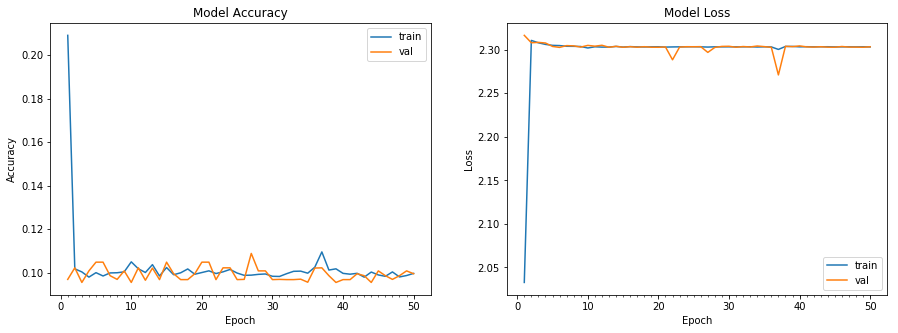

batch size    : 32
epochs        : 50
optimizer     : sgd
learning rate : 0.05
node size     : 128
Epoch 1/50
1562/1562 [==============================] - 137s 87ms/step - loss: 1.2181 - acc: 0.5339 - val_loss: 1.0439 - val_acc: 0.6105

Epoch 00001: val_loss improved from inf to 1.04385, saving model to models7/rnn_lstm.h5
Epoch 2/50
1562/1562 [==============================] - 136s 87ms/step - loss: 0.8729 - acc: 0.6810 - val_loss: 0.8808 - val_acc: 0.6588

Epoch 00002: val_loss improved from 1.04385 to 0.88075, saving model to models7/rnn_lstm.h5
Epoch 3/50
1562/1562 [==============================] - 136s 87ms/step - loss: 1.4188 - acc: 0.4466 - val_loss: 1.8268 - val_acc: 0.2015

Epoch 00003: val_loss did not improve from 0.88075
Epoch 4/50
1562/1562 [==============================] - 136s 87ms/step - loss: 1.7996 - acc: 0.2227 - val_loss: 1.7407 - val_acc: 0.2582

Epoch 00004: val_loss did not improve from 0.88075
Epoch 5/50
1562/1562 [==============================] - 136s 87ms/s

In [ ]:
for batch_size in batch_sizes:
  for epochs in num_epochs:
    for optimizer_name in optimizers_name:
      for learning_rate in learning_rates:
        for node_size in node_sizes:
            print("==================")
            print("batch size    : {}".format(batch_size))
            print("epochs        : {}".format(epochs))
            print("optimizer     : {}".format(optimizer_name))
            print("learning rate : {}".format(learning_rate))
            print("node size     : {}".format(node_size))

            if optimizer_name == 'adam':
              optimizer = optimizers.Adam(lr=learning_rate)
            elif optimizer_name == 'rmsprop':
              optimizer = optimizers.RMSprop(lr=learning_rate)
            elif optimizer_name == 'sgd':
              optimizer = optimizers.SGD(lr=learning_rate, momentum=0.9,nesterov=True)

            # Embedding dimensions.
            row_hidden = node_size
            col_hidden = node_size

            
            TRAIN_BATCH_SIZE = batch_size
            TEST_BATCH_SIZE = (batch_size)
            TEST_BATCH_SIZE
            
            train_step = int(TRAIN_DATA_SIZE/TRAIN_BATCH_SIZE)
            test_step = int(TEST_DATA_SIZE/TEST_BATCH_SIZE)
            
            train_batches = train_gen.flow(x_train, y_train, batch_size=TRAIN_BATCH_SIZE, shuffle=False, seed=10)

            test_batches = test_gen.flow(x_test, y_test, batch_size=TEST_BATCH_SIZE, shuffle=False, seed=10)

            row, col, pixel = x_train.shape[1:]
            
            
            # 4D input.
            x = Input(shape=(row, col, pixel))

            # Encodes a row of pixels using TimeDistributed Wrapper.
            encoded_rows = TimeDistributed(LSTM(row_hidden))(x)

            # Encodes columns of encoded rows.
            encoded_columns = LSTM(col_hidden)(encoded_rows)

            # Final predictions and model.
            prediction = Dense(num_classes, activation='softmax')(encoded_columns)

            model = Model(x, prediction)
            model.compile(loss='categorical_crossentropy',
                          optimizer=optimizer,
                          metrics=['accuracy'])

            


            # Training.
            # model.fit(x_train, y_train,
            #           batch_size=batch_size,
            #           epochs=epochs,
            #           verbose=1,
            #           validation_data=(x_test, y_test))
            model_file_name = "models7/rnn_lstm_{}_{}_{}NMom_{}_{}.h5" . format(batch_size, epochs, optimizer_name, learning_rate, node_size)
            checkpoint = ModelCheckpoint(model_file_name, monitor='val_loss', verbose=0, save_best_only= True, mode='auto')

            best_model_file_name = "models7/rnn_lstm.h5"
            best_checkpoint = ModelCheckpoint(best_model_file_name, monitor='val_loss', verbose=1, save_best_only= True, mode='auto')
       
            h = model.fit_generator(train_batches, steps_per_epoch=train_step, validation_data=test_batches, callbacks=[checkpoint, best_checkpoint], validation_steps=test_step, epochs=epochs, verbose=1)
            #h = model.fit_generator(train_batches, validation_data=test_batches, callbacks=[checkpoint, best_checkpoint], verbose=1)
  
            plot_model(h)

In [ ]:
from google.colab import files

print(best_model)
print("Best Stats")
print("==========")
print("accuracy      : {}".format(best_accuracy))
print("batch size    : {}".format(best_batch_size))
print("epochs        : {}".format(best_epochs))
print("optimizer     : {}".format(best_optimizer))
print("learning rate : {}".format(best_learning_rate))
print("node size     : {}".format(best_node_size))

filepath = "models/rnn_lstm_best.h5"
files.download(filepath)